# Assignment 3

## Instructions
- Run this notebook on ```Google Colab(preferable)```
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells. 

## Packages Used
- Keras [link](https://keras.io/guides/)

## Submission
- Rename the notebook to `<roll_number>_Assignment3_Q1.ipynb`.

## Question 1

This question is based on seminal work by Zhang et al. The paper is titled 'Understanding deep learning requires rethinking generalization'. The paper talks about how the traditional methods fail to explain generalization of neural network. They show that a sufficiently parameterized network can easily fit a random labeling of the training data. This fitting cannot be curbed by explicit regularization.


## Q) 1.1 
Lets take a hello world dataset for ML algorithm the MNIST!
This question requires you to train a convolutional neural network.
Architecture: 4 layers of convolution with 64 filters in each layer. Keep activation map size same using padding.

In [49]:
from tensorflow import keras   # feel free to use MNIST data from other sources
from tensorflow.keras import layers
import numpy as np

In [50]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [51]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("Train data shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

Train data shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


#### One-hot-encode your labels here

In [52]:
print ('label shape: ',np.shape(y_train),np.shape(y_test))
def encode(y):
  y_final = []
  for i in y:
    tmp = np.zeros(10)
    tmp[i] = 1
    y_final.append(tmp)
  return np.array(y_final)

y_train = encode(y_train)
y_test = encode(y_test)
print ('label shape: ',np.shape(y_train),np.shape(y_test))

label shape:  (60000,) (10000,)
label shape:  (60000, 10) (10000, 10)


In [53]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

#### Define the model mentioned above
    1) Print the number of trainable parameters
     Use sgd optimizer with softmax at last layer 
     Train the model until convergence (use test data only for model selection and early stopping!)
    2) Report the train and test accuracy
    3) Plot the train and test accuracy and loss throughout the training

In [54]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dropout

early_stopping = EarlyStopping(
    min_delta=0.001,
    patience=4,
    restore_best_weights=True,
)

In [55]:
#code here
model = keras.Sequential(
    [Conv2D(64,3,activation='relu',padding='same'),
     Conv2D(64,3,activation='relu',padding='same'),
     Conv2D(64,3,activation='relu',padding='same'),
     Conv2D(64,3,activation='relu',padding='same'),
     #MaxPool2D(2,2), #Pooling layer,
     Flatten(),
     layers.Dense(units=28*28,activation='relu'),
     layers.Dense(units=28*14,activation='relu'),
     layers.Dense(units=28*7,activation='relu'),
     layers.Dense(units=28*2,activation='relu'),
     layers.Dense(units=10, activation='softmax'),]
)
model.compile(
    optimizer="sgd",
    loss="mse",
    metrics="accuracy"
)
h = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=128,
    epochs=20,
#    callbacks=[early_stopping],
)

Epoch 1/10
469/469 [==============================] - 33s 70ms/step - loss: 0.0900 - accuracy: 0.1051 - val_loss: 0.0899 - val_accuracy: 0.1142
Epoch 2/10
469/469 [==============================] - 33s 70ms/step - loss: 0.0899 - accuracy: 0.1384 - val_loss: 0.0899 - val_accuracy: 0.1502
Epoch 3/10
469/469 [==============================] - 32s 68ms/step - loss: 0.0898 - accuracy: 0.1822 - val_loss: 0.0897 - val_accuracy: 0.1948
Epoch 4/10
469/469 [==============================] - 33s 70ms/step - loss: 0.0897 - accuracy: 0.2388 - val_loss: 0.0896 - val_accuracy: 0.2602
Epoch 5/10
469/469 [==============================] - 32s 68ms/step - loss: 0.0894 - accuracy: 0.3050 - val_loss: 0.0893 - val_accuracy: 0.3202
Epoch 6/10
469/469 [==============================] - 32s 68ms/step - loss: 0.0891 - accuracy: 0.3386 - val_loss: 0.0888 - val_accuracy: 0.3488
Epoch 7/10
469/469 [==============================] - 33s 70ms/step - loss: 0.0883 - accuracy: 0.3601 - val_loss: 0.0877 - val_accuracy:

In [56]:
Loss = h.history['loss']
train_accuracy = h.history['accuracy']
test_accuracy = h.history['val_accuracy']

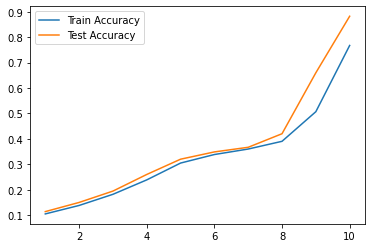

In [57]:
import matplotlib.pyplot as plt
x = [i for i in range(1,11)]
plt.plot(x,train_accuracy,label='Train Accuracy')
plt.plot(x,test_accuracy,label='Test Accuracy')
plt.legend()
plt.show()

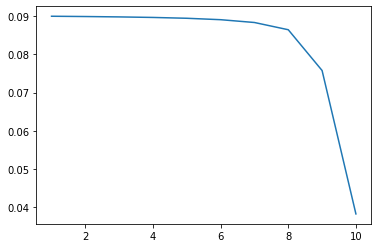

In [58]:
plt.plot(x, Loss)
plt.show()

## Q) 1.2
Now lets start adding label noise to the dataset


1) Randomize 20% of train labels and repeat Q1 (1,2 & 3)

2) Randomize 40% of train labels and repeat Q1 (3)

3) Randomize 60% of train labels and repeat Q1 (3)

4) Randomize 80% of train labels and repeat Q1 (3)

5) Randomize 100% of train labels and repeat Q1 (3)


Epoch 1/10
469/469 [==============================] - 34s 70ms/step - loss: 0.0900 - accuracy: 0.1214 - val_loss: 0.0899 - val_accuracy: 0.1906
Epoch 2/10
469/469 [==============================] - 33s 70ms/step - loss: 0.0899 - accuracy: 0.2084 - val_loss: 0.0899 - val_accuracy: 0.2695
Epoch 3/10
469/469 [==============================] - 33s 70ms/step - loss: 0.0899 - accuracy: 0.2453 - val_loss: 0.0898 - val_accuracy: 0.2959
Epoch 4/10
469/469 [==============================] - 33s 71ms/step - loss: 0.0898 - accuracy: 0.2638 - val_loss: 0.0897 - val_accuracy: 0.3113
Epoch 5/10
469/469 [==============================] - 32s 69ms/step - loss: 0.0897 - accuracy: 0.2792 - val_loss: 0.0896 - val_accuracy: 0.3337
Epoch 6/10
469/469 [==============================] - 33s 71ms/step - loss: 0.0896 - accuracy: 0.2978 - val_loss: 0.0895 - val_accuracy: 0.3682
Epoch 7/10
469/469 [==============================] - 32s 69ms/step - loss: 0.0895 - accuracy: 0.3253 - val_loss: 0.0892 - val_accuracy:

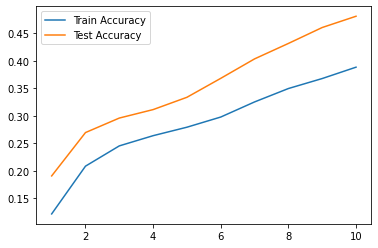

In [60]:

import random
for f in range(1,6):
  print("Randomized ", (i*20), "% of train labels")
  y_new = np.copy(y_train)
  change = random.sample(range(len(y_train)), int(f*len(y_train)/5))
  for i in change:
    y_new[i] = np.zeros(10)
    n = random.randint(0,9)
    y_new[i][n] = 1
  model_new = keras.Sequential(
      [Conv2D(64,3,activation='relu',padding='same'),
      Conv2D(64,3,activation='relu',padding='same'),
      Conv2D(64,3,activation='relu',padding='same'),
      Conv2D(64,3,activation='relu',padding='same'),
      #MaxPool2D(2,2), #Pooling layer,
      Flatten(),
      layers.Dense(units=28*28,activation='relu'),
      layers.Dense(units=28*14,activation='relu'),
      layers.Dense(units=28*7,activation='relu'),
      layers.Dense(units=28*2,activation='relu'),
      layers.Dense(units=10, activation='softmax'),]
  )
  model_new.compile(
      optimizer="sgd",
      loss="mse",
      metrics="accuracy"
  )
  h = model_new.fit(
      x_train, y_new,
      validation_data=(x_test, y_test),
      batch_size=128,
      epochs=10,
  #    callbacks=[early_stopping],
  )
  Loss = h.history['loss']
  train_accuracy_new = h.history['accuracy']
  test_accuracy_new = h.history['val_accuracy']
  x = [i for i in range(1,11)]
  plt.plot(x,train_accuracy_new,label='Train Accuracy')
  plt.plot(x,test_accuracy_new,label='Test Accuracy')
  plt.legend()
  plt.show()